In this assignment students will build the random forest model after normalizing the variable to house pricing from boston data set. 

In [1]:
import numpy as np 
 
import pandas as pd 
 
import matplotlib.pyplot as plt 
 
import seaborn as sns 

In [2]:
from sklearn import datasets

In [3]:
boston = datasets.load_boston() 
 
features = pd.DataFrame(boston.data, columns=boston.feature_names) 
 
targets = boston.target 
 

In [4]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# Data Exploration
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


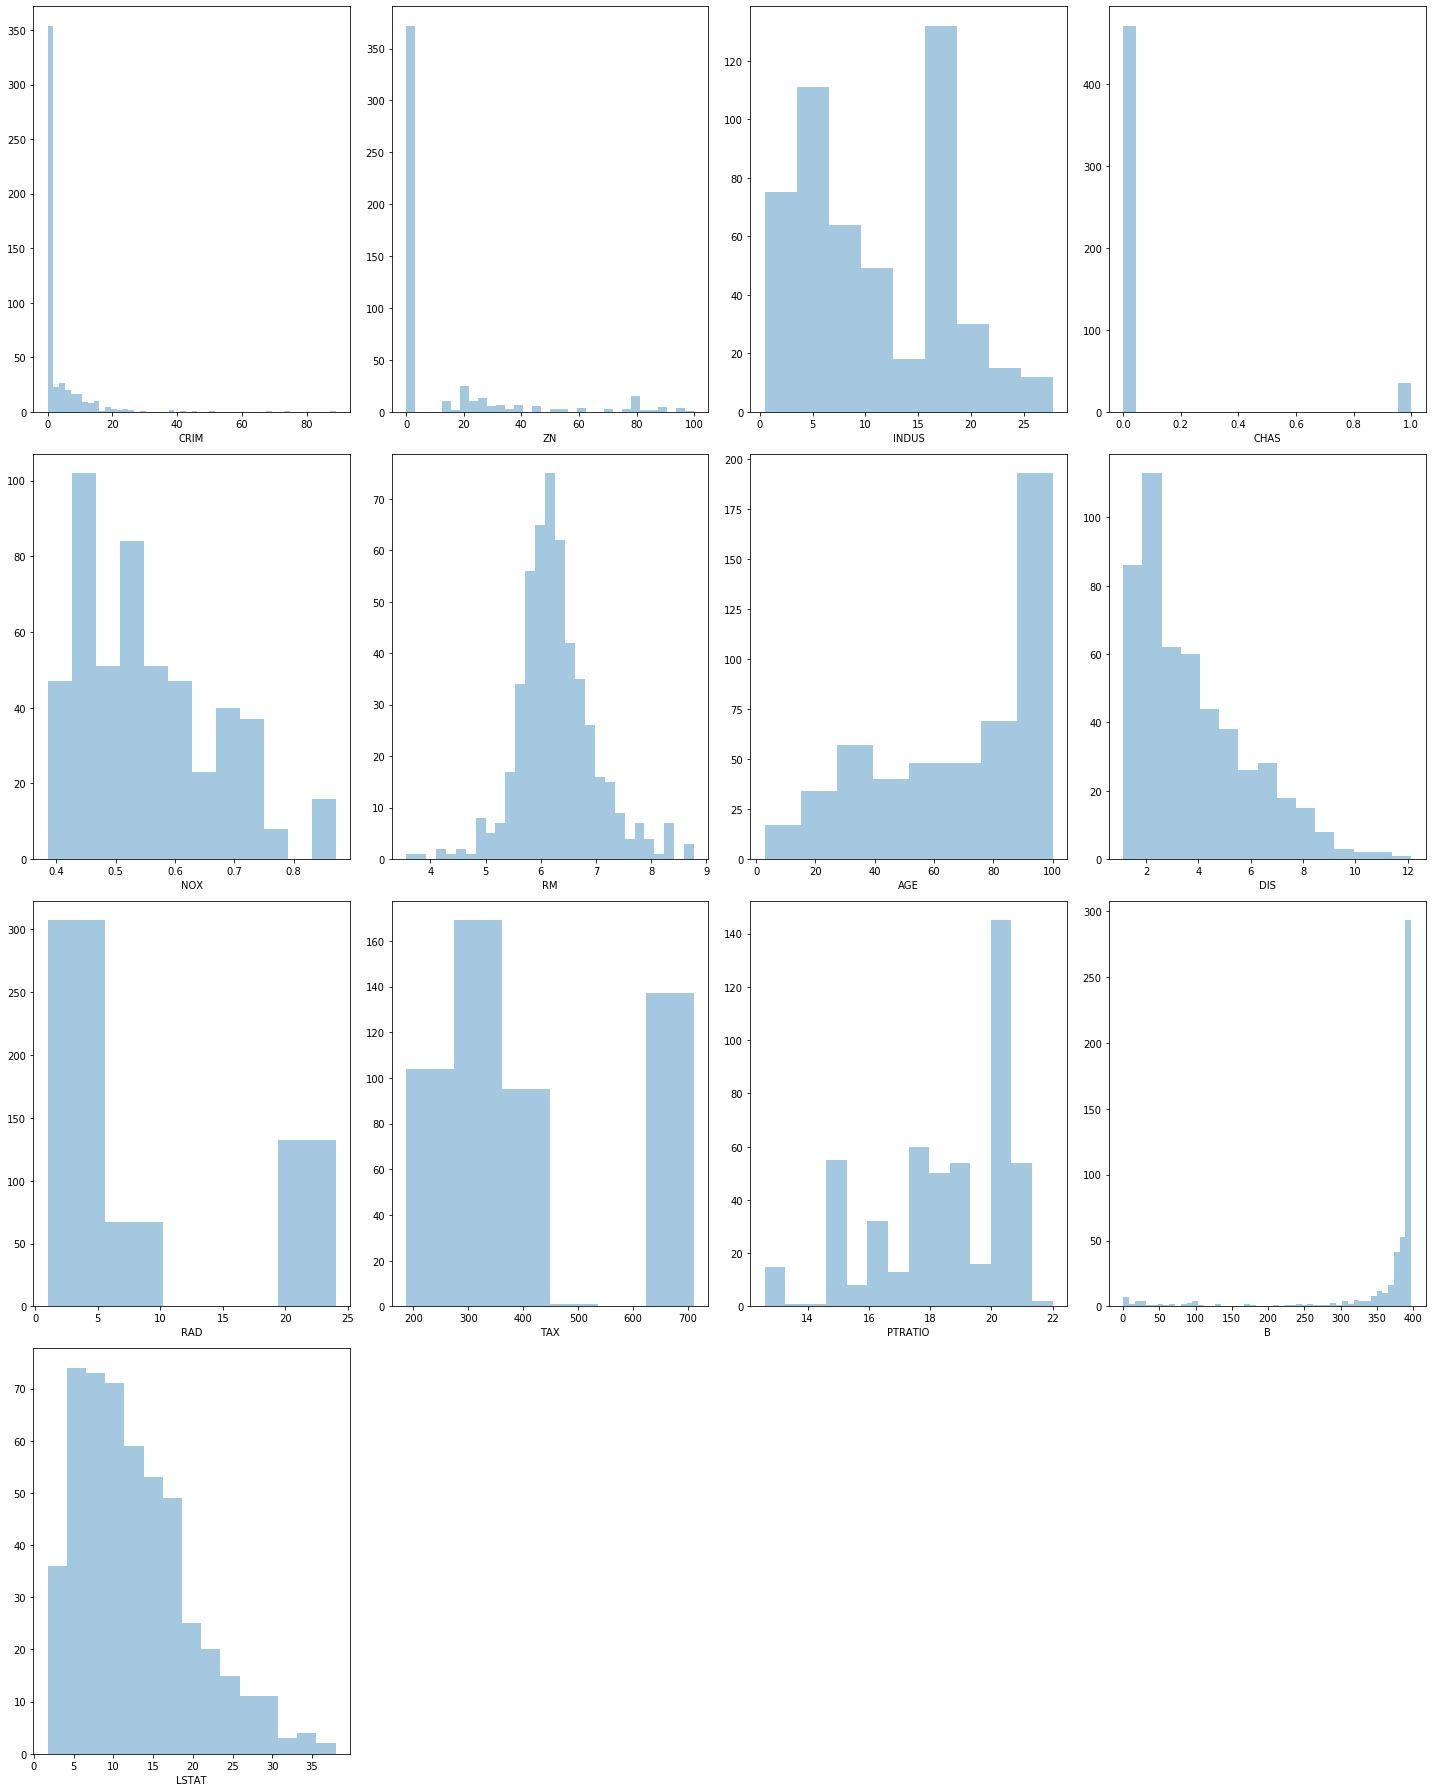

In [6]:
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1
for col in features:
    if plotnumber<=len(features.columns):
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(features[col],kde=False)
    plotnumber+=1

plt.tight_layout()


In [7]:
features.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [8]:
# Standardize the data
from sklearn import preprocessing

In [25]:
scale = preprocessing.Normalizer()

In [26]:
features = scale.fit_transform(features)

In [27]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features,targets,test_size=0.30)


In [32]:
# Model training on random forest
from sklearn import ensemble
rf = ensemble.RandomForestRegressor(n_estimators=200,verbose=1)
rf.fit(xtrain,ytrain)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.9s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=1, warm_start=False)

In [33]:
# prediction on test data
ypred = rf.predict(xtest)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    0.0s finished


In [34]:
# model evaluation
from sklearn import metrics

In [35]:
metrics.r2_score(ytest,ypred)

0.8158502690004894